# Analysis of Big-Mart Dataset
Daniel Martinez Bielostotzky

01/2019

# Introduction

Retail is one of the industries that can also take advantage of data analysis to optimize their income among many other processes such as customer service, inventory management, customized offerings and even space allocation.

This notebook presents the analysis of the <a href="https://www.analyticsvidhya.com/">analyticsvidhya</a> dataset containing the sales of different products in 10 outlets in different cities of the One Stop Shopping center and Free Marketplace BigMart. More  info about BigMart <a href="http://www.bigmart.com/about-us.html">here</a>.
 
**Problem Statement**

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

**Dataset**

The dataset is divided into train (8523 rows) and test (5681 rows) and has the following characteristics:

![Variable and description table](https://i.imgur.com/IX7FBG8.jpg)

## Initial Data Analysis

### Quality of the data ###

As a first exploration of the data let's import the train set and see their structure.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('Train.csv')
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


A first contact with the dataset shows us a total of 6 categorical variables (Item_Fat_Content, Item_Type, Outlet_Size, Outlet_Location_Type and Outlet_Type), 3 quantitative variables (Item_Weight, Item_MRP and Outlet_Establishment_Year) and 2 identifiers (Item_Identifier and Outlet_Identifier).

We can also see the presence of missing values in the weights of the product and the size of the establishment.

The identifiers will not be taken into account in the model and should therefore be removed from the DataFrame, but will be kept as separate variables for possible analysis later.

In [2]:
#Extract identifiers
items_id = df['Item_Identifier'].copy()
outlets_id = df['Outlet_Identifier'].copy()

#Drop identifiers columns
df.drop('Item_Identifier', axis='columns', inplace=True)
df.drop('Outlet_Identifier', axis='columns', inplace=True)

#Show changes
df.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


The identifiers are useful to understand the behavior of the products but especially of the stores, with them we can obtain the store that sells the most grouped by Tier or <a href="https://public.tableau.com/views/BigMartSales/SalesbyTypeofItem?:embed=y&:display_count=yes&publish=yes">Sales of each type of product in each outlet</a>.

![Sales by Type of Item](https://i.imgur.com/1qYXyNQ.jpg "Sales by Type of Item")

The existence of very similar sales between outlets (with certain exceptions) seems to indicate that these may not be related to outlet tier. This hypothesis will be corroborated by a future correlation analysis between the variables.

Continuing with the analysis, let's analyze the missing values in the features.

### Missing Data Analysis

Let's visualize the missing values.

In [3]:
def get_missing_data_table(dataframe):
    total = dataframe.isnull().sum()
    percentage = dataframe.isnull().sum() / dataframe.isnull().count()
    
    missing_data = pd.concat([total, percentage], axis='columns', keys=['TOTAL','PERCENTAGE'])
    return missing_data.sort_values(by='TOTAL', ascending=False)


get_missing_data_table(df)

,TOTAL,PERCENTAGE
Outlet_Size,2410,0.282764
Item_Weight,1463,0.171653
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Location_Type,0,0.000000
Outlet_Type,0,0.000000
Item_Outlet_Sales,0,0.000000


The missing values represent a large percentage of both variables, so it is important to find a way to fulfill them that makes sense with the intended objective.

Let's find out how many weightless products we have, and which outlets are undersized.

In [4]:
#Working with a copy of the main DataFrame

#Concat id and weight
df_copy = pd.concat([items_id, df['Item_Weight']], axis='columns')
#Get null values
df_copy = df_copy[df['Item_Weight'].isnull()]
#Get how many nulls ids are
len(df_copy['Item_Identifier'].unique())

1142

In [5]:
#Working with a copy of the main DataFrame

#Concat id and size
df_copy = pd.concat([outlets_id, df['Outlet_Size']], axis='columns')
#Get null values
df_copy = df_copy[df['Outlet_Size'].isnull()]
#Get nulls ids
df_copy['Outlet_Identifier'].unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

As a first alternative to solve these missing values we will use their identifiers to look for other records in the dataset where the value exists.

In [6]:
#----Item Weight
#Concat id and weight
df_copy = pd.concat([items_id, df['Item_Weight']], axis='columns')
#Get null values
df_copy = df_copy[df['Item_Weight'].isnull()]
#Get how many nulls ids are
nulls = df_copy['Item_Identifier'].unique()

from scipy.stats import mode
for id in nulls:
    #Get value
    df_weight = df.loc[items_id == id, 'Item_Weight']
    value = mode(df_weight.values, nan_policy='omit').mode[0]
    
    if value == 0:
        value = np.nan #No results if mode = 0
    
    df.loc[(df_weight == np.nan).index, 'Item_Weight'] = value

#Show changes
get_missing_data_table(df)

,TOTAL,PERCENTAGE
Outlet_Size,2410,0.282764
Item_Weight,4,0.000469
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Location_Type,0,0.000000
Outlet_Type,0,0.000000
Item_Outlet_Sales,0,0.000000


In [7]:
#----Outlet Size
df_copy2 = pd.concat([outlets_id, df['Outlet_Size']], axis='columns')
#Get null values
df_copy2 = df_copy2[df['Outlet_Size'].isnull()]
#Get how many nulls ids are
nulls = df_copy2['Outlet_Identifier'].unique()

from collections import Counter
for id in nulls:
    #Get value
    df_size = df.loc[outlets_id == id, 'Outlet_Size']
    value = Counter(df_size.values).most_common(1)[0][0]
    
    df.loc[(df_size == np.nan).index, 'Outlet_Size'] = value

#Show changes
get_missing_data_table(df)

,TOTAL,PERCENTAGE
Outlet_Size,2410,0.282764
Item_Weight,4,0.000469
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Location_Type,0,0.000000
Outlet_Type,0,0.000000
Item_Outlet_Sales,0,0.000000


With the new table we can see that the missing values in the weight of items were almost completely solved. However, there was no change in implementing the strategy with the size of the outlets. 

The four rows still remaining in 'Item_Weight' will be removed from the dataset.

In [8]:
#Delete null in 'Item_Weight'
def get_null_observations(dataframe, column):
    return dataframe[pd.isnull(dataframe[column])]

def delete_null_observations(dataframe, column):
    fixed_df = dataframe.drop(get_null_observations(dataframe,column).index)
    return fixed_df

df = delete_null_observations(df, 'Item_Weight')

#Show results
get_missing_data_table(df)

,TOTAL,PERCENTAGE
Outlet_Size,2410,0.282897
Item_Weight,0,0.000000
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Location_Type,0,0.000000
Outlet_Type,0,0.000000
Item_Outlet_Sales,0,0.000000


In order to solve the missing values in 'Outlet_Size' I will then do an analysis to find a variable (without missing values) that explains the sales in each outlet quite well, with the purpose of using the average size in those variables. Some analyses of this type are those that were performed when the identifiers were explained within the DataFrame variables.

Let's look at the sales behavior in each outlet using the variable 'Outlet_Type'.

![Sales by Type](https://i.imgur.com/Q9rWsX6.jpg "Sales by Type")

As we can see, the quantity of products sold tends to be the same depending on the type of store. The strategy will then be to fill the missing values using the size that is most repeated according to the type of store.

![Outlet Size vs Outlet Type](https://i.imgur.com/L9IqC1K.jpg "Otlet Size by Outlet Type")

So the decision will be to fill 'Small' for grocery stores, 'Medium' for type 2 and 3 supermarkets, and 'Small' for type 1 supermarkets.

In [9]:
#Get columns
size_type = pd.concat([df['Outlet_Size'], df['Outlet_Type']], axis='columns', keys=['Outlet_Size', 'Outlet_Type'])

#Transform
size_type.loc[size_type['Outlet_Type'] == 'Grocery Store', 'Outlet_Size'] = 'Small'
size_type.loc[size_type['Outlet_Type'] == 'Supermarket Type1', 'Outlet_Size'] = 'Small'
size_type.loc[size_type['Outlet_Type'] == 'Supermarket Type2', 'Outlet_Size'] = 'Medium'
size_type.loc[size_type['Outlet_Type'] == 'Supermarket Type3', 'Outlet_Size'] = 'Medium'

#Replace in DataFrame
df['Outlet_Size'] = size_type['Outlet_Size'].copy()

#Show results
get_missing_data_table(df)

,TOTAL,PERCENTAGE
Item_Weight,0,0.0
Item_Fat_Content,0,0.0
Item_Visibility,0,0.0
Item_Type,0,0.0
Item_MRP,0,0.0
Outlet_Establishment_Year,0,0.0
Outlet_Size,0,0.0
Outlet_Location_Type,0,0.0
Outlet_Type,0,0.0
Item_Outlet_Sales,0,0.0


Once we are sure that the data is completly clean, the next step in the initial analysis could be look at the distributions of the data. 

### Distributions and Transformations

#### Items Categorical Distributions

![Item Categorical Distributions](https://i.imgur.com/ayz0GQX.jpg "Item Categorical Distribution")

From the graph we can see that the variable 'Item_Fat_Content' has records where 'LF' and 'low fat' mean 'Low Fat' as well as 'reg' and 'Regular'. Let's fix it.

In [10]:
#Transform 'LF' and 'low fat' to 'Low Fat'
df.loc[df['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'
df.loc[df['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = 'Low Fat'

#Transform 'reg' to 'Regular'
df.loc[df['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'

#Show changes
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

#### Items Numerical Distributions

![Item Numerical Distributions](https://i.imgur.com/STfjQIM.jpg "Item Numerical Distributions")

The most relevant of these graphics is the presence of outliers in 'Item_Visibility' and 'Item_Weight' (and null values in this one, null values will be treated in their totality later on).

An outlier<sup><a href="https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm">1</a></sup> is a value that distances itself from the majority of data and is usually caused by different types of errors. However, before making any decision it is necessary to analyze these values in context, particularly in this dataset where we see the presence of a large group of outliers; Let's first analyze their frequency.

In [11]:
#Item_Visibility outliers freq
print('Visibility Outliers: {0}'.format(df[df['Item_Visibility'] > 0.19].Item_Visibility.count()))

#Item_Weight outliers freq 
print('Weight Outliers: {0}'.format(df[df['Item_Weight'] >  19].Item_Weight.count()))

Visibility Outliers: 159
Weight Outliers: 1046


The frequency of outliers is high, so it is necessary to analyze if they are relevant given the context. For 'Item_Weight' unfortunately the extent to which the'weight' of products is measured is unknown. 

However, because the lower value is close to 5 and because (judging by the types of items) there are low weight items it is most appropriate to assume that it is measured in ounces, and products of almost 22 ounces are acceptable given this context.

In the case of 'Item_Visibility' items with more than 30% of the sample area might sound exaggerated, but they may not be a mistake because there may be outlets specialized in specific products (such as newspapers).

Let's analyze some plots to confirm these hypotheses.

![Visibility Outliers](https://i.imgur.com/BvwveKC.jpg "Outliers in Visivility by Type of Items")
![Weight Outliers](https://i.imgur.com/hq7yTBP.jpg "Outliers in Weight of Items")

The 'Item_Visibility' outliers chart confirms the hypothesis, 100% of outliers are grocery stores specialized in different types of products.

However, the table of values for weight does not solve the hypothesis since there are products with high weight in all categories and in different types of stores.

The final decision on the outliers in the weight of the items will be made according to their influence on the results of the final model.

#### Transformation for normality
As box plot suggest, the MRP of items is normally distributed, but visibility and weight looks skewed, the plots bellow will explain the distribution form for these features.

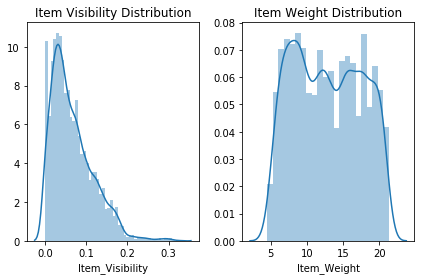

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot(1,2,1)
sns.distplot(df['Item_Visibility'], ax=ax)
ax.set(title='Item Visibility Distribution')

ax = fig.add_subplot(1,2,2)
sns.distplot(df['Item_Weight'], ax=ax)
ax.set(title='Item Weight Distribution')

fig.tight_layout()
plt.show()

As box plots suggested, the data is not nomal, using Box Cox transformation we get:

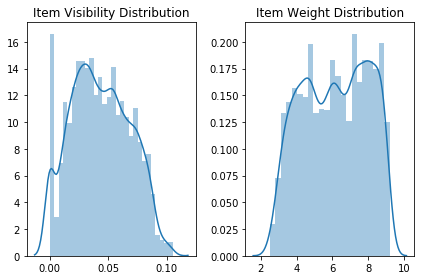

In [14]:
from scipy import stats

fig = plt.figure()
ax = fig.add_subplot(1,2,1)
data = np.asarray(df[['Item_Visibility']].values) + 1
sns.distplot(stats.boxcox(data)[0], ax=ax)
ax.set(title='Item Visibility Distribution')

ax = fig.add_subplot(1,2,2)
data = np.asarray(df[['Item_Weight']].values)
sns.distplot(stats.boxcox(data)[0], ax=ax)
ax.set(title='Item Weight Distribution')

fig.tight_layout()
plt.show()

#### Outlets Distributions

![Outlet Distributions](https://i.imgur.com/VBcn1S5.jpg "Outlet Distribution")

From the outles distributions, the excessive occurrence of type 1 supermarkets and missing values in 'Outlet_Size' stands out. 

No necessary transformations or anomalies.

### Initial Data Analysis Conclusions

1. Low fat products (5405 products) represent the majority of the products in the dataset with 64.26% of the total (8411 products), regular fat products (3006 products) are the category for the rest of the products in the dataset with 35.74% of the total.

2. The most seller product is Fruits and Vegetables with 15.17% (2,820,060) of the total products selled. The second most selled product is Snack Food with 14.70% (2,732,786) of the total products selled.

3. Household is the product with the higher average MRP (149.42), followed by Dairy (148.58) and Starchy Foods (147.84).

4. Outlet 19 and 27 are the elder ones stablished in 1985. The newer outlet is outlet 18 stablished in 2009.

5. Outlet is the outlet with most number of seller products with a total of 3,453,926 products selled.

6. Each outlet seems to sell all products in equal quantities. (See below)

In [23]:
%%html
<div class='tableauPlaceholder' id='viz1547334301124' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bi&#47;BigMartSales&#47;SalesbyTypeofItem&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='BigMartSales&#47;SalesbyTypeofItem' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bi&#47;BigMartSales&#47;SalesbyTypeofItem&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1547334301124');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## Exploratory Data Analysis

